Enter the same word or sentence used previously: good
LSTM Predictions: [['enough', 0.0551033690571785], ['deal', 0.03613436594605446], ['heaven', 0.015592057257890701], ['made', 0.014579476788640022], ['sen', 0.013655569404363632], ['cri', 0.008337687700986862], ['chanc', 0.00746711902320385], ['come', 0.007198211271315813], ['word', 0.007075964007526636], ['articl', 0.0069364639930427074]]
N-grams Predictions: ['quite', 'enough', 'news', 'deal', 'lose', 'oh', 'bowed', 'look', 'wilson', 'worker']


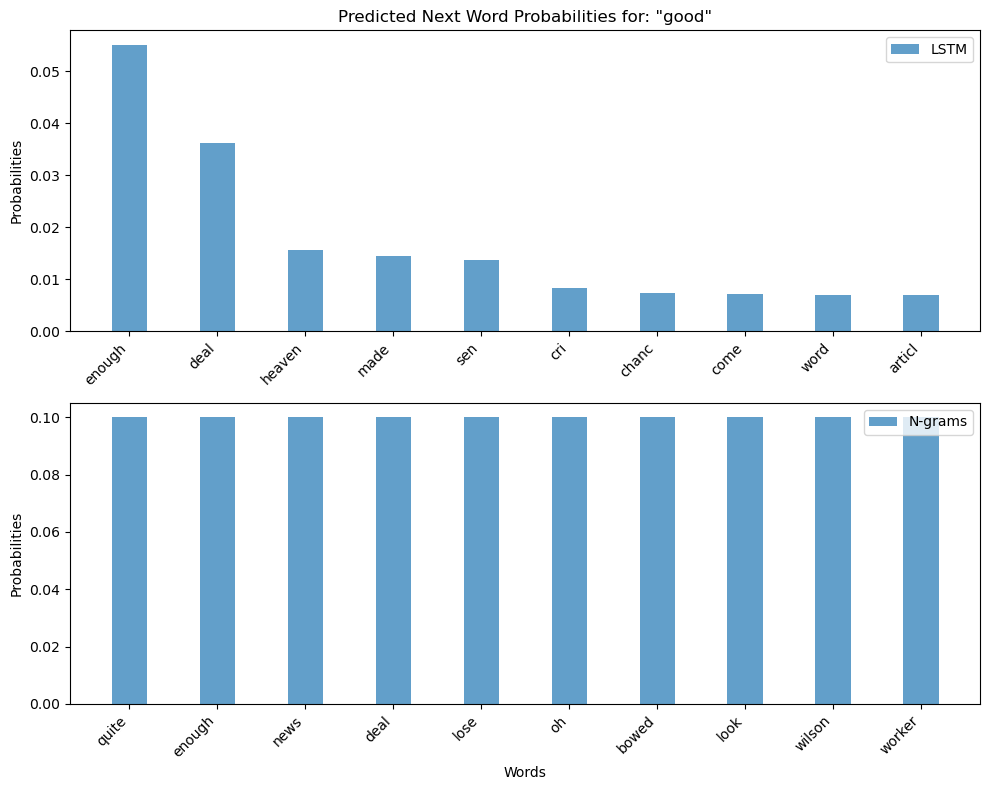

In [13]:
import json
import matplotlib.pyplot as plt

# Function to plot predictions
def plot_predictions(predictions_lstm, predictions_ngram, input_sentence):
    words_lstm = [entry[0] for entry in predictions_lstm]
    lstm_probs = [entry[1] for entry in predictions_lstm]

    if isinstance(predictions_ngram, list):
        # If predictions_ngram is a list, create a uniform distribution
        num_words_ngram = len(predictions_ngram)
        ngram_probs = [1 / num_words_ngram] * num_words_ngram
        words_ngram = predictions_ngram
    else:
        words_ngram = list(predictions_ngram.keys())
        ngram_probs = list(predictions_ngram.values())
    
    x_lstm = range(len(words_lstm))
    x_ngram = range(len(words_ngram))
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    axs[0].bar(x_lstm, lstm_probs, width=0.4, align='center', label='LSTM', alpha=0.7)
    axs[0].set_ylabel('Probabilities')
    axs[0].set_title(f'Predicted Next Word Probabilities for: "{input_sentence}"')
    axs[0].set_xticks(x_lstm)
    axs[0].set_xticklabels(words_lstm, rotation=45, ha='right')
    axs[0].legend()

    axs[1].bar(x_ngram, ngram_probs, width=0.4, align='center', label='N-grams', alpha=0.7)
    axs[1].set_xlabel('Words')
    axs[1].set_ylabel('Probabilities')
    axs[1].set_xticks(x_ngram)
    axs[1].set_xticklabels(words_ngram, rotation=45, ha='right')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    input_sentence = input("Enter the same word or sentence used previously: ")
    
    # Load LSTM predictions
    with open('lstm_predictions.json', 'r') as f:
        predictions_lstm = json.load(f)
    
    # Load N-grams predictions
    with open('ngram_predictions.json', 'r') as f:
        predictions_ngram = json.load(f)
    
    print("LSTM Predictions:", predictions_lstm)
    print("N-grams Predictions:", predictions_ngram)
    
    plot_predictions(predictions_lstm, predictions_ngram, input_sentence)
